In [ ]:
from google.colab import files
import io
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.mixture import GaussianMixture
from pylab import concatenate, normal
from scipy.stats import ks_2samp
from datetime import date

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['owid-covid-data.csv']))

Saving owid-covid-data.csv to owid-covid-data.csv


In [ ]:
df=df.fillna(0)
df_ind = df.loc[df["location"] == "India"]
df_sa = df.loc[df["location"] == "South Africa"]
df_zim = df.loc[df["location"] == "Zimbabwe"]
df_afg = df.loc[df["location"] == "Afghanistan"]
df_us = df.loc[df["location"] == "United States"]
df_uk = df.loc[df["location"] == "United Kingdom"]
df_ger = df.loc[df["location"] == "Germany"]
df_ind=df_ind.iloc[:,[3,5]]
df_sa=df_sa.iloc[:,[3,5]]
df_zim=df_zim.iloc[:,[3,5]]
df_afg=df_afg.iloc[:,[3,5]]
df_us=df_us.iloc[:,[3,5]]
df_uk=df_uk.iloc[:,[3,5]]
df_ger=df_ger.iloc[:,[3,5]]

In [ ]:
df_zim=df_zim.iloc[:600,:]
df_sa=df_sa.iloc[:650,:]
df_afg=df_afg.iloc[:600,:]
df_us=df_us.iloc[:680,:]
df_uk=df_uk.iloc[:580,:]
df_ger=df_ger.iloc[:550,:]

In [ ]:
df_ind.reset_index(inplace=True,drop=True)
df_zim.reset_index(inplace=True,drop=True)
df_sa.reset_index(inplace=True,drop=True)
df_afg.reset_index(inplace=True,drop=True)
df_us.reset_index(inplace=True,drop=True)
df_uk.reset_index(inplace=True,drop=True)
df_ger.reset_index(inplace=True,drop=True)

In [ ]:
m,d,y=df_ind.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_ind.index.max()+1):
  m1,d1,y1=df_ind.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_ind.iloc[i,0]=(date1-date0).days
  if df_ind.iloc[i,1]==0:
    df_ind.iloc[i,1]=(df_ind.iloc[i-1,1]+df_ind.iloc[i+1,1])/2
df_ind['new_cases']=df_ind['new_cases'].astype(int)

m,d,y=df_sa.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_sa.index.max()+1):
  m1,d1,y1=df_sa.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_sa.iloc[i,0]=(date1-date0).days
  if df_sa.iloc[i,1]==0:
    df_sa.iloc[i,1]=(df_sa.iloc[i-1,1]+df_sa.iloc[i+1,1])/2
df_sa['new_cases']=df_sa['new_cases'].astype(int)

m,d,y=df_zim.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_zim.index.max()+1):
  m1,d1,y1=df_zim.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_zim.iloc[i,0]=(date1-date0).days
  if df_zim.iloc[i,1]==0:
    df_zim.iloc[i,1]=df_zim.iloc[i+1,1]/2
    df_zim.iloc[i+1,1]=df_zim.iloc[i+1,1]-df_zim.iloc[i,1]
df_zim['new_cases']=df_zim['new_cases'].astype(int)

m,d,y=df_afg.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_afg.index.max()+1):
  m1,d1,y1=df_afg.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_afg.iloc[i,0]=(date1-date0).days
  if df_afg.iloc[i,1]==0:
    df_afg.iloc[i,1]=(df_afg.iloc[i-1,1]+df_afg.iloc[i+1,1])/2
df_afg['new_cases']=df_afg['new_cases'].astype(int)

m,d,y=df_us.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_us.index.max()+1):
  m1,d1,y1=df_us.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_us.iloc[i,0]=(date1-date0).days
  if df_us.iloc[i,1]==0:
    df_us.iloc[i,1]=(df_us.iloc[i-1,1]+df_us.iloc[i+1,1])/2
df_us['new_cases']=df_us['new_cases'].astype(int)

m,d,y=df_uk.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_uk.index.max()+1):
  m1,d1,y1=df_uk.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_uk.iloc[i,0]=(date1-date0).days
  if df_uk.iloc[i,1]==0:
    df_uk.iloc[i,1]=(df_uk.iloc[i-1,1]+df_uk.iloc[i+1,1])/2
df_uk['new_cases']=df_uk['new_cases'].astype(int)

m,d,y=df_ger.iloc[0,0].split("/")
date0=date(int(y),int(m),int(d))
for i in range(df_ger.index.max()+1):
  m1,d1,y1=df_ger.iloc[i,0].split("/")
  date1=date(int(y1),int(m1),int(d1))
  df_ger.iloc[i,0]=(date1-date0).days
  if df_ger.iloc[i,1]==0:
    df_ger.iloc[i,1]=(df_ger.iloc[i-1,1]+df_ger.iloc[i+1,1])/2
df_ger['new_cases']=df_ger['new_cases'].astype(int)

In [ ]:
df_ind=df_ind.iloc[72:754,:]
df_zim=df_zim.iloc[59:596,:]
df_sa=df_sa.iloc[22:643,:]
df_afg=df_afg.iloc[23:575,:]

df_ind.reset_index(inplace=True,drop=True)
df_zim.reset_index(inplace=True,drop=True)
df_sa.reset_index(inplace=True,drop=True)
df_afg.reset_index(inplace=True,drop=True)
df_us.reset_index(inplace=True,drop=True)
df_uk.reset_index(inplace=True,drop=True)
df_ger.reset_index(inplace=True,drop=True)

for i in range(df_ind.index.max()+1):
  df_ind.iloc[i,0]=df_ind.iloc[i,0]-df_ind.iloc[0,0]
for i in range(df_zim.index.max()+1):
  df_zim.iloc[i,0]=df_zim.iloc[i,0]-df_zim.iloc[0,0]
for i in range(df_sa.index.max()+1):
  df_sa.iloc[i,0]=df_sa.iloc[i,0]-df_sa.iloc[0,0]
for i in range(df_afg.index.max()+1):
  df_afg.iloc[i,0]=df_afg.iloc[i,0]-df_afg.iloc[0,0]
for i in range(df_us.index.max()+1):
  df_us.iloc[i,0]=df_us.iloc[i,0]-df_us.iloc[0,0]
for i in range(df_uk.index.max()+1):
  df_uk.iloc[i,0]=df_uk.iloc[i,0]-df_uk.iloc[0,0]
for i in range(df_ger.index.max()+1):
  df_ger.iloc[i,0]=df_ger.iloc[i,0]-df_ger.iloc[0,0]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
print(df_zim.shape)

(537, 2)


In [ ]:
ior=df_ind.iloc[:,1]
zor=df_zim.iloc[:,1]
saor=df_sa.iloc[:,1]
afgor=df_afg.iloc[:,1]
usor=df_us.iloc[:,1]
ukor=df_uk.iloc[:,1]
gor=df_ger.iloc[:,1]

In [ ]:
print("Ind vs Zim : ",ks_2samp(ior, zor))
print("Ind vs SA : ",ks_2samp(ior, saor))
print("Ind vs Afg : ",ks_2samp(ior, afgor))
print("Ind vs USA : ",ks_2samp(ior, usor))
print("Ind vs UK : ",ks_2samp(ior, ukor))
print("Ind vs Ger : ",ks_2samp(ior, gor))

Ind vs Zim :  Ks_2sampResult(statistic=0.9648093841642229, pvalue=2.43875125747567e-243)
Ind vs SA :  Ks_2sampResult(statistic=0.6874991145678383, pvalue=7.240429943278472e-134)
Ind vs Afg :  Ks_2sampResult(statistic=0.9688628926006205, pvalue=3.631657620071078e-249)
Ind vs USA :  Ks_2sampResult(statistic=0.1892444367776436, pvalue=4.0313086202559134e-11)
Ind vs UK :  Ks_2sampResult(statistic=0.5185812518960461, pvalue=1.2186587691436046e-73)
Ind vs Ger :  Ks_2sampResult(statistic=0.5749560117302053, pvalue=7.571784922581526e-88)


In [ ]:
from scipy.stats import epps_singleton_2samp as epps
print("Ind vs Zim : ",epps(ior, zor))
print("Ind vs SA : ",epps(ior, saor))
print("Ind vs Afg : ",epps(ior, afgor))
print("Ind vs USA : ",epps(ior, usor))
print("Ind vs UK : ",epps(ior, ukor))
print("Ind vs Ger : ",epps(ior, gor))

Ind vs Zim :  Epps_Singleton_2sampResult(statistic=2058.847987149311, pvalue=0.0)
Ind vs SA :  Epps_Singleton_2sampResult(statistic=1250.7702790951691, pvalue=1.5686508028033668e-269)
Ind vs Afg :  Epps_Singleton_2sampResult(statistic=2048.8567975989627, pvalue=0.0)
Ind vs USA :  Epps_Singleton_2sampResult(statistic=122.18607091086771, pvalue=1.8225301019172178e-25)
Ind vs UK :  Epps_Singleton_2sampResult(statistic=421.65507154546344, pvalue=5.817642027996323e-90)
Ind vs Ger :  Epps_Singleton_2sampResult(statistic=873.280864945461, pvalue=1.024677121915286e-187)


In [ ]:
from scipy.stats import brunnermunzel as bmz
print("Ind vs Zim : ",bmz(ior, zor))
print("Ind vs SA : ",bmz(ior, saor))
print("Ind vs Afg : ",bmz(ior, afgor))
print("Ind vs USA : ",bmz(ior, usor))
print("Ind vs UK : ",bmz(ior, ukor))
print("Ind vs Ger : ",bmz(ior, gor))

Ind vs Zim :  BrunnerMunzelResult(statistic=-1094.85877529649, pvalue=0.0)
Ind vs SA :  BrunnerMunzelResult(statistic=-66.15386705384478, pvalue=0.0)
Ind vs Afg :  BrunnerMunzelResult(statistic=-1127.2496647723322, pvalue=0.0)
Ind vs USA :  BrunnerMunzelResult(statistic=6.3545624062729615, pvalue=2.846529678635079e-10)
Ind vs UK :  BrunnerMunzelResult(statistic=-29.230964363770152, pvalue=3.217255531583181e-142)
Ind vs Ger :  BrunnerMunzelResult(statistic=-47.12942019241196, pvalue=2.9684768097852375e-277)


In [ ]:
! pip install similaritymeasures
import similaritymeasures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 395 kB 8.5 MB/s 
  Created wheel for similaritymeasures: filename=similaritymeasures-0.4.4-py3-none-any.whl size=14557 sha256=ed81dc3d4ec7f27623e0b4d28ae23b6ec29f3dd77d25416e50fedbf5ed2f9014
  Stored in directory: /root/.cache/pip/wheels/a9/3a/35/009cc44db92a3500424a89baac7e77c219a44209c67f867a1e
Successfully built similaritymeasures


In [ ]:
print("Ind vs Zim : ",similaritymeasures.frechet_dist(ior, zor))
print("Ind vs SA : ",similaritymeasures.frechet_dist(ior, saor))
print("Ind vs Afg : ",similaritymeasures.frechet_dist(ior, afgor))
print("Ind vs USA : ",similaritymeasures.frechet_dist(ior, usor))
print("Ind vs UK : ",similaritymeasures.frechet_dist(ior, ukor))
print("Ind vs Ger : ",similaritymeasures.frechet_dist(ior, gor))

Ind vs Zim :  411078.0
Ind vs SA :  387703.0
Ind vs Afg :  410945.0
Ind vs USA :  123705.0
Ind vs UK :  346118.0
Ind vs Ger :  380411.0


In [ ]:
a=np.array(df_ind,dtype='float')
b=np.array(df_zim,dtype='float')
c=np.array(df_sa,dtype='float')
d=np.array(df_afg,dtype='float')
e=np.array(df_us,dtype='float')
f=np.array(df_uk,dtype='float')
g=np.array(df_ger,dtype='float')

In [ ]:
print("Ind vs Zim : ",similaritymeasures.curve_length_measure(a,b))
print("Ind vs SA : ",similaritymeasures.curve_length_measure(a,c))
print("Ind vs Afg : ",similaritymeasures.curve_length_measure(a,d))
print("Ind vs USA : ",similaritymeasures.curve_length_measure(a,e))
print("Ind vs UK : ",similaritymeasures.curve_length_measure(a,f))
print("Ind vs Ger : ",similaritymeasures.curve_length_measure(a,g))

Ind vs Zim :  19.595217860038353
Ind vs SA :  18.435262473335904
Ind vs Afg :  20.674682861708636
Ind vs USA :  27.271068022341815
Ind vs UK :  17.734699761085636
Ind vs Ger :  18.751915439840708


In [ ]:
print("Ind vs Zim : ",similaritymeasures.pcm(a,b))
print("Ind vs SA : ",similaritymeasures.pcm(a,c))
print("Ind vs Afg : ",similaritymeasures.pcm(a,d))
print("Ind vs USA : ",similaritymeasures.pcm(a,e))
print("Ind vs UK : ",similaritymeasures.pcm(a,f))
print("Ind vs Ger : ",similaritymeasures.pcm(a,g))

Ind vs Zim :  68.20879901093912
Ind vs SA :  78.21203810039448
Ind vs Afg :  92.19773473328874
Ind vs USA :  45.28915581508065
Ind vs UK :  62.4032254174066
Ind vs Ger :  69.94745640220015


In [ ]:
print("Ind vs Zim : ",similaritymeasures.dtw(a,b)[0])
print("Ind vs SA : ",similaritymeasures.dtw(a,c)[0])
print("Ind vs Afg : ",similaritymeasures.dtw(a,d)[0])
print("Ind vs USA : ",similaritymeasures.dtw(a,e)[0])
print("Ind vs UK : ",similaritymeasures.dtw(a,f)[0])
print("Ind vs Ger : ",similaritymeasures.dtw(a,g)[0])

Ind vs Zim :  41402670.66716619
Ind vs SA :  32162121.138483226
Ind vs Afg :  41264191.41035775
Ind vs USA :  12151388.56538364
Ind vs UK :  23004373.01136646
Ind vs Ger :  28349188.08481525


In [ ]:
print("Ind vs Zim : ",similaritymeasures.area_between_two_curves(a,b))
print("Ind vs SA : ",similaritymeasures.area_between_two_curves(a,c))
print("Ind vs Afg : ",similaritymeasures.area_between_two_curves(a,d))
print("Ind vs USA : ",similaritymeasures.area_between_two_curves(a,e))
print("Ind vs UK : ",similaritymeasures.area_between_two_curves(a,f))
print("Ind vs Ger : ",similaritymeasures.area_between_two_curves(a,g))

Ind vs Zim :  149721826.34375
Ind vs SA :  173072786.25
Ind vs Afg :  221980418.53125
Ind vs USA :  569082144.5
Ind vs UK :  268963463.5
Ind vs Ger :  300858528.5625


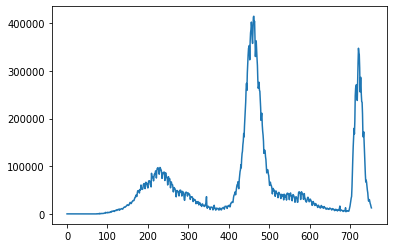

In [ ]:
plt.plot(df_ind['date'], df_ind['new_cases'])

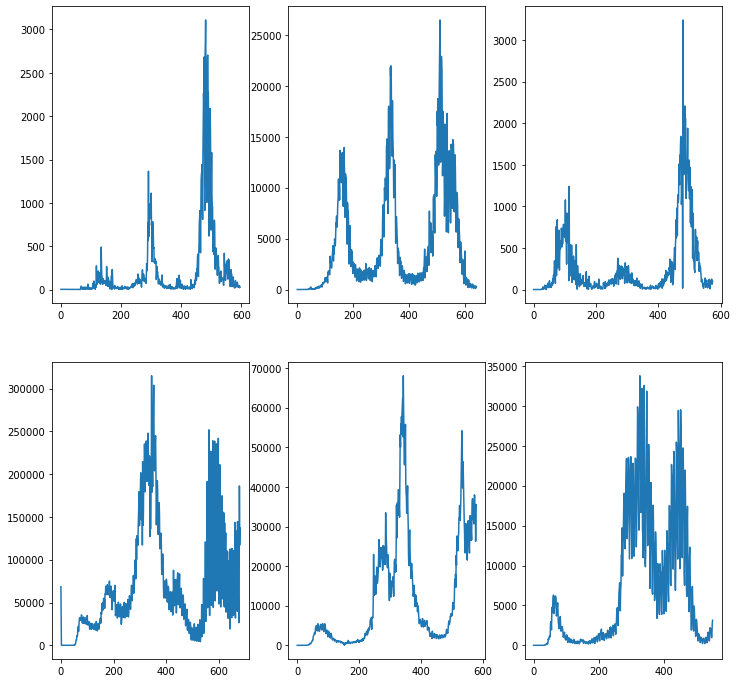

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12]

plt.subplot(2, 3, 1)
plt.plot(df_zim['date'], df_zim['new_cases'])

plt.subplot(2, 3, 2)
plt.plot(df_sa['date'], df_sa['new_cases'])

plt.subplot(2, 3, 3)
plt.plot(df_afg['date'], df_afg['new_cases'])

plt.subplot(2, 3, 4)
plt.plot(df_us['date'], df_us['new_cases'])

plt.subplot(2, 3, 5)
plt.plot(df_uk['date'], df_uk['new_cases'])

plt.subplot(2, 3, 6)
plt.plot(df_ger['date'], df_ger['new_cases'])

plt.show()